In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../../../data/raw/dataset-bids/bansomdejchaopraya-rajabhat university, bangkok-air-quality.csv', parse_dates=['date'])

In [3]:
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2024-10-01,54,,,,,
1,2024-10-02,43,,,,,
2,2024-10-03,51,,,,,
3,2024-10-04,54,,,,,
4,2024-10-05,78,,,,,


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2927 non-null   datetime64[ns]
 1    pm25   2927 non-null   object        
 2    pm10   2927 non-null   object        
 3    o3     2927 non-null   object        
 4    no2    2927 non-null   object        
 5    so2    2927 non-null   object        
 6    co     2927 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 160.2+ KB


# Cleaning the dataset

In [5]:
# trim white space of column names
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [7]:
df['pm25'].unique()

array([' 54', ' 43', ' 51', ' 78', ' 88', ' 87', ' 103', ' 73', ' 83',
       ' 72', ' 62', ' 61', ' 57', ' 63', ' 66', ' 71', ' 60', ' 64',
       ' 59', ' 53', ' 75', ' 56', ' 68', ' 55', ' 67', ' 52', ' 81',
       ' 58', ' 65', ' 70', ' 80', ' 77', ' 69', ' 89', ' 84', ' 95',
       ' 93', ' 94', ' 82', ' 76', ' 74', ' 143', ' 118', ' 104', ' 122',
       ' 133', ' 119', ' 99', ' 79', ' 98', ' 123', ' 121', ' 109',
       ' 101', ' 114', ' 112', ' 92', ' 90', ' 124', ' 110', ' 127',
       ' 132', ' 136', ' 159', ' 141', ' 117', ' 113', ' 153', ' 162',
       ' 147', ' 142', ' 135', ' 131', ' 146', ' 158', ' 157', ' 137',
       ' 91', ' 108', ' 86', ' 111', ' 152', ' 156', ' 166', ' 105',
       ' 100', ' 85', ' 107', ' 126', ' 115', ' 96', ' 139', ' 116',
       ' 145', ' 144', ' 130', ' 138', ' 39', ' 22', ' 41', ' 46', ' 45',
       ' 31', ' 47', ' 48', ' 49', ' 32', ' 38', ' 50', ' 106', ' 149',
       ' 148', ' 42', ' 40', ' 129', ' 168', ' 174', ' 150', ' 128',
       ' 151'

In [8]:
df['pm25'] = pd.to_numeric(df['pm25'], errors='coerce')

In [9]:
df['pm10'].unique()

array([' ', ' 14', ' 19', ' 30', ' 34', ' 22', ' 8', ' 24', ' 6', ' 40',
       ' 49', ' 57', ' 56', ' 59', ' 47', ' 33', ' 32', ' 44', ' 45',
       ' 53', ' 58', ' 66', ' 63', ' 61', ' 55', ' 68', ' 64', ' 52',
       ' 42', ' 36', ' 35', ' 41', ' 43', ' 27', ' 31', ' 37', ' 26',
       ' 29', ' 28', ' 46', ' 50', ' 51', ' 23', ' 25', ' 20', ' 21',
       ' 18', ' 17', ' 877', ' 811', ' 526', ' 697', ' 751', ' 719',
       ' 768', ' 733', ' 849', ' 869', ' 309', ' 770', ' 854', ' 858',
       ' 693', ' 756', ' 511', ' 771', ' 459', ' 550', ' 542', ' 563',
       ' 379', ' 92', ' 69', ' 39', ' 62', ' 60', ' 38', ' 67', ' 74',
       ' 70', ' 82', ' 75', ' 54', ' 48', ' 95', ' 171', ' 295', ' 731',
       ' 631', ' 503', ' 449', ' 488', ' 893', ' 636', ' 571', ' 387',
       ' 830', ' 760', ' 780', ' 804', ' 778', ' 773', ' 725', ' 873',
       ' 618', ' 651', ' 674', ' 585', ' 537', ' 772', ' 692', ' 514',
       ' 603', ' 13', ' 4', ' 3', ' 5', ' 1', ' 10', ' 2', ' 11', ' 9',
       

In [10]:
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')

In [11]:
df['o3'].unique()

array([' ', ' 8', ' 9', ' 10', ' 7', ' 13', ' 5', ' 14', ' 4', ' 3',
       ' 12', ' 16', ' 22', ' 24', ' 15', ' 23', ' 25', ' 28', ' 111',
       ' 6', ' 11', ' 19', ' 20', ' 17', ' 26', ' 30', ' 21', ' 41',
       ' 32', ' 18', ' 27', ' 34', ' 29', ' 2', ' 33', ' 1', ' 31', ' 37',
       ' 35', ' 39', ' 49', ' 42', ' 36', ' 45', ' 43', ' 62', ' 40',
       ' 57', ' 38', ' 51', ' 47', ' 87', ' 64', ' 72', ' 63', ' 50',
       ' 53', ' 48', ' 82', ' 44', ' 68', ' 66', ' 70', ' 71', ' 91',
       ' 93', ' 46', ' 60', ' 56', ' 54', ' 75', ' 65', ' 67', ' 77',
       ' 59', ' 52', ' 58', ' 86', ' 89', ' 79', ' 55', ' 73', ' 61',
       ' 90'], dtype=object)

In [12]:
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')

In [13]:
df['no2'].unique()

array([' ', ' 1', ' 2', ' 4', ' 9', ' 3', ' 5', ' 7', ' 6', ' 24', ' 23',
       ' 8', ' 10', ' 20', ' 25', ' 13', ' 27', ' 31', ' 17', ' 12',
       ' 22', ' 19', ' 14', ' 11', ' 15', ' 18', ' 16', ' 21', ' 26',
       ' 33', ' 28', ' 32', ' 41', ' 35', ' 30', ' 29', ' 38', ' 34',
       ' 42', ' 36', ' 43', ' 49', ' 56', ' 37', ' 40', ' 44', ' 52',
       ' 53', ' 45', ' 46', ' 63', ' 39', ' 51'], dtype=object)

In [14]:
df['no2'] = pd.to_numeric(df['no2'], errors='coerce')

In [15]:
df['so2'].unique()

array([' ', ' 1', ' 2', ' 3', ' 4', ' 14', ' 36', ' 35', ' 60', ' 5',
       ' 8', ' 6', ' 7', ' 42', ' 41', ' 13', ' 18', ' 30', ' 9'],
      dtype=object)

In [16]:
df['so2'] = pd.to_numeric(df['so2'], errors='coerce')

In [17]:
df['co'].unique()

array([' ', ' 15', ' 11', ' 17', ' 5', ' 10', ' 7', ' 8', ' 4', ' 3',
       ' 1', ' 9', ' 2', ' 6', ' 18', ' 12', ' 14', ' 13', ' 21', ' 24',
       ' 19', ' 40', ' 23', ' 16', ' 20', ' 26', ' 25', ' 32'],
      dtype=object)

In [18]:
df['co'] = pd.to_numeric(df['co'], errors='coerce')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2927 entries, 0 to 2926
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2927 non-null   datetime64[ns]
 1   pm25    2037 non-null   float64       
 2   pm10    2374 non-null   float64       
 3   o3      2067 non-null   float64       
 4   no2     2098 non-null   float64       
 5   so2     955 non-null    float64       
 6   co      815 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 160.2 KB


# EDA

In [24]:
df.isna().sum()

date       0
pm25     890
pm10     553
o3       860
no2      829
so2     1972
co      2112
dtype: int64

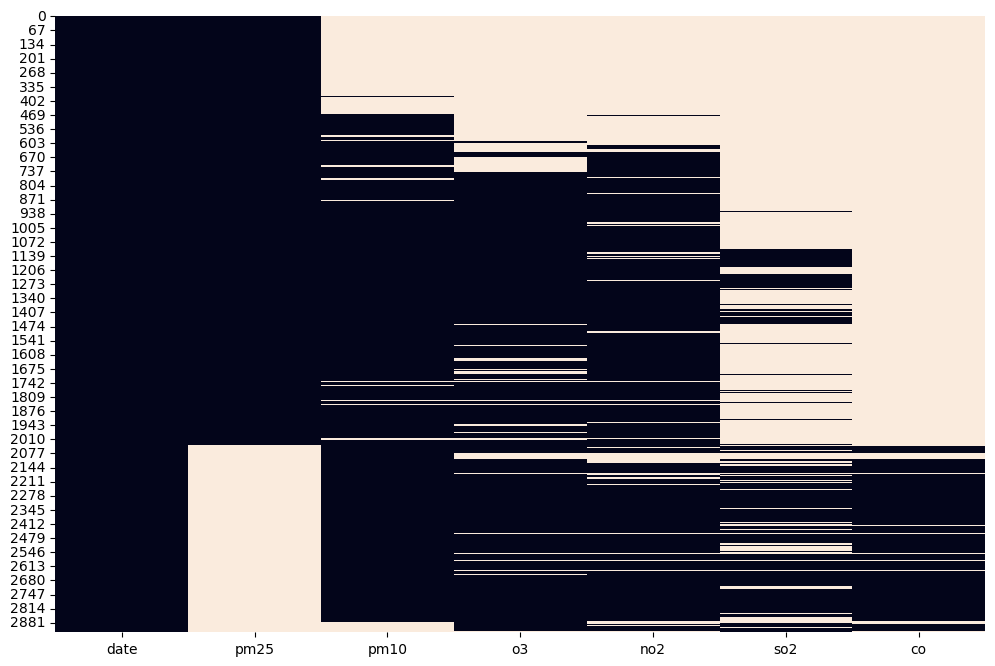

In [26]:
# heatmap of missing value for pm25
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False)
plt.show()

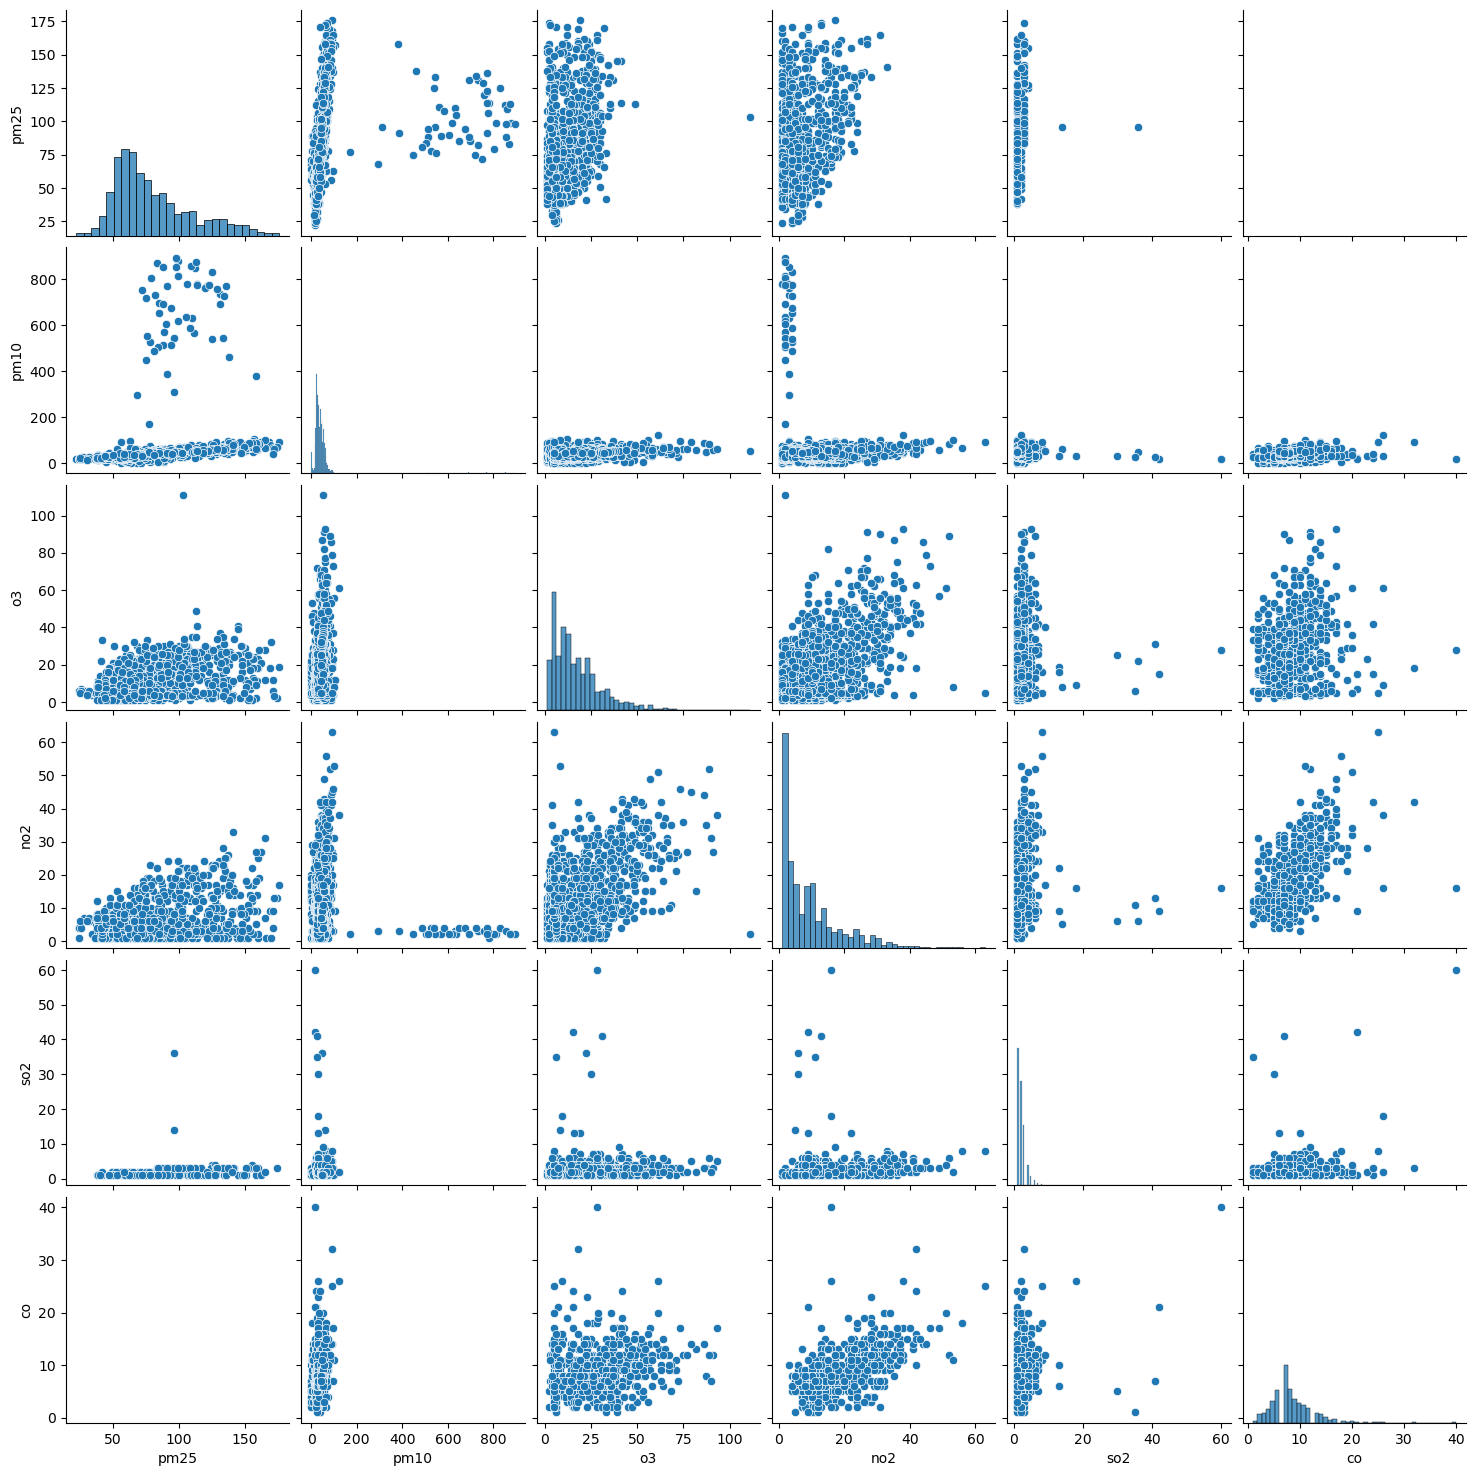

In [20]:
sns.pairplot(df)

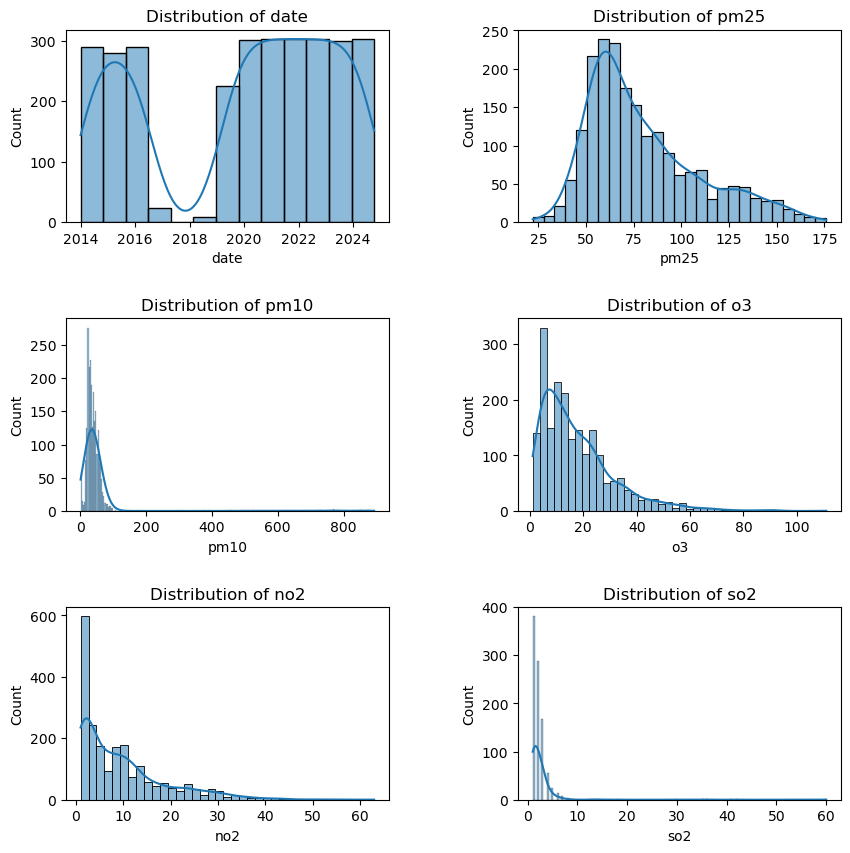

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for ax, col in zip(axes.flatten(), df.columns):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.show()

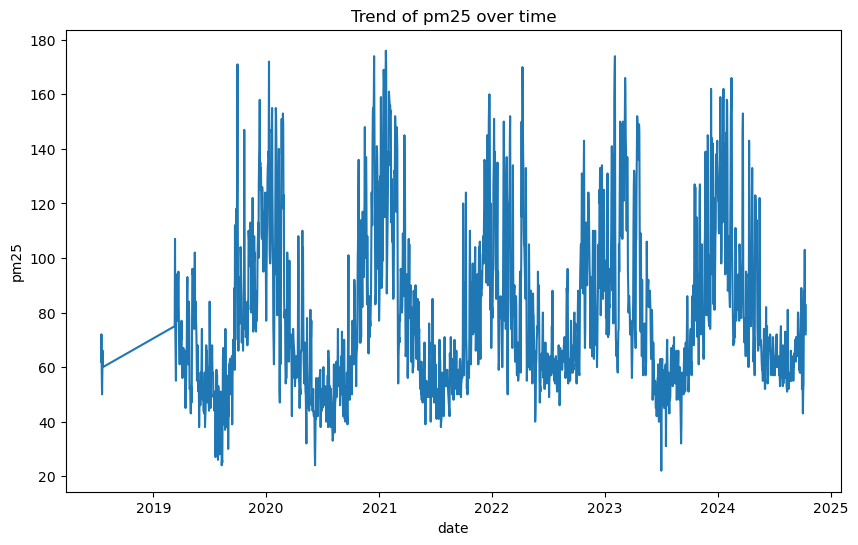

In [22]:
# trend of pm25 over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='pm25')
plt.title('Trend of pm25 over time')
plt.show()

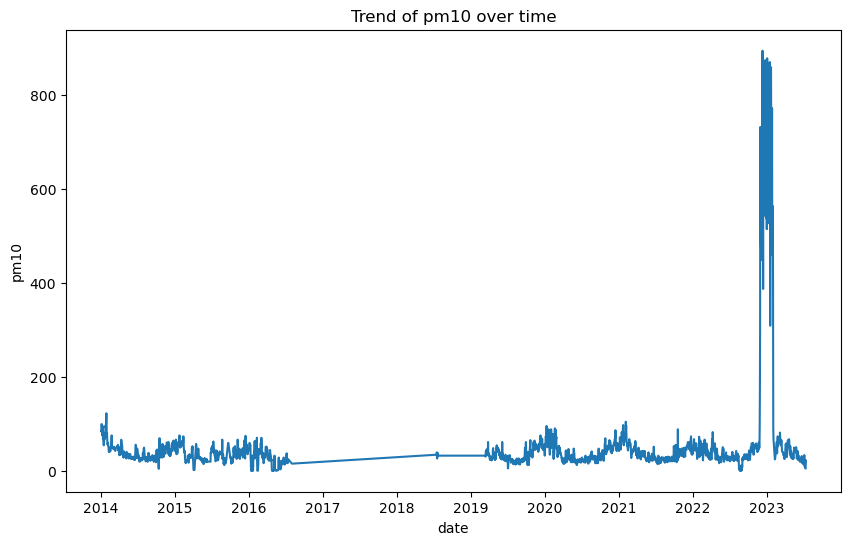

In [23]:
# trend of pm25 over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='pm10')
plt.title('Trend of pm10 over time')
plt.show()